# Force Movement Dynamics Analysis

This notebook analyzes force movement dynamics and Euclidean distances between trials across a multi-day training experiment.

## Overview

The analysis focuses on:
- **Force Movement Dynamics**: Visualizing force distance matrices and execution times across training days.
- **Neighbouring Trial Distances**: Calculating Euclidean distances between adjacent trials while controlling for execution time differences.
- **Triplet Analysis**: Comparing force distances between the first and last trials of triplets, categorized by whether the middle trial was an error.

## Data Structure

The primary dataset (`data`) contains the following key columns:
- `SubNum`: Subject identifier.
- `ET`: Execution time in milliseconds.
- `speed`: presses per second. 
- `day`: Experiment day.
- `isError`: Boolean flag for trial errors.
- `PC_{i}`: PCA reduced components of normalized force traces (15 components)
- `seq` & `hand`: Sequence and hand identifiers.

## Data Loading
Change data_dir to your data directory in setglobals.py before running



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utils
import Detrending
import seaborn as sns
import importlib
from tqdm import tqdm
import setglobals as gl

utils.set_figure_style(scale="1col")

sns.set_palette("colorblind")


In [2]:
### DATA LOADING
### Change gl.data_dir to your data directory in setglobals.py before running
data = pd.read_csv(gl.data_dir + 'SL3_Forces.csv', sep = '\t')
data['forceVector'] = data[[col for col in data.columns if col.startswith('PC_')]].apply(lambda x: np.array(x), axis=1)
# data = data.drop(columns=[col for col in data.columns if col.startswith('PC_')])

# change correspondingly for each experiment
n_trials_per_block = 20
n_blocks_per_day = 20
n_trials_per_day = n_trials_per_block * n_blocks_per_day
n_days = 3

# - SubNum: Subject number (e.g., 1 to 16 (exlcuding 8))
# - BN: Block number
# - TN: Trial number within the block (integer, from 1 to n_trials_per_block)
# - ET: Execution time in milliseconds
# - speed: presses per second
# - day: Day of the experiment (from 1 to n_days)
# - isError: Boolean flag indicating if the trial was an error (True/False)
# - T: Overall trial number across the experiment
# - seq: Sequence identifier (integer)
# - hand: Hand used (integer, e.g., 0 or 1 for left/right)
# - points: Points scored in the trial (-1 for error, 0, 1, or 3 for correct)
# - forceVector: Numpy array of force components after PCA

print(data.columns.tolist())  # To list the column names


['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6', 'PC_7', 'PC_8', 'PC_9', 'PC_10', 'PC_11', 'PC_12', 'PC_13', 'PC_14', 'PC_15', 'SubNum', 'BN', 'TN', 'ET', 'day', 'isError', 'T', 'seq', 'hand', 'points', 'speed', 'forceVector']


## Force Distances Across Training

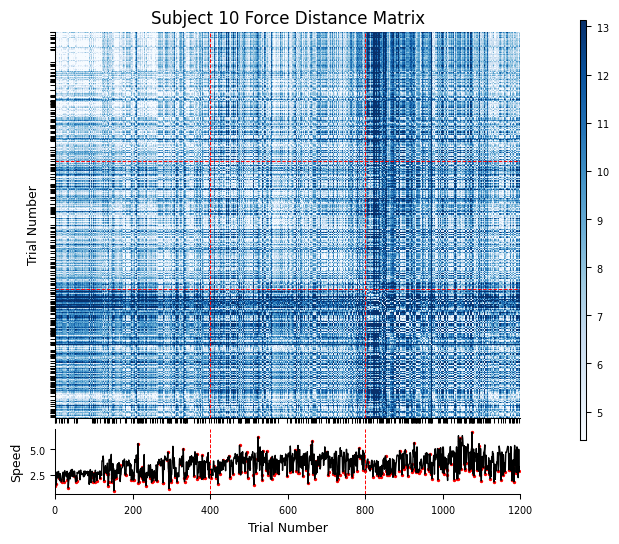

In [6]:
# This function plots the force distance matrix for a given subject across all trials.
# Red dashed lines separate days. Below the heatmap, it plots execution times aligned with the trials.
# Red dots indicate error trials.

# Parameters:
# - data: experiment data
# - subj: int, the subject number to plot
# - n_trials_per_day
# - n_days

utils.plot_force_movement_dynamics(data, subj=10, n_trials_per_day=n_trials_per_day, n_days=n_days)

## Neighbouring Trial Force Distance

100%|██████████| 15/15 [00:00<00:00, 20.77it/s]


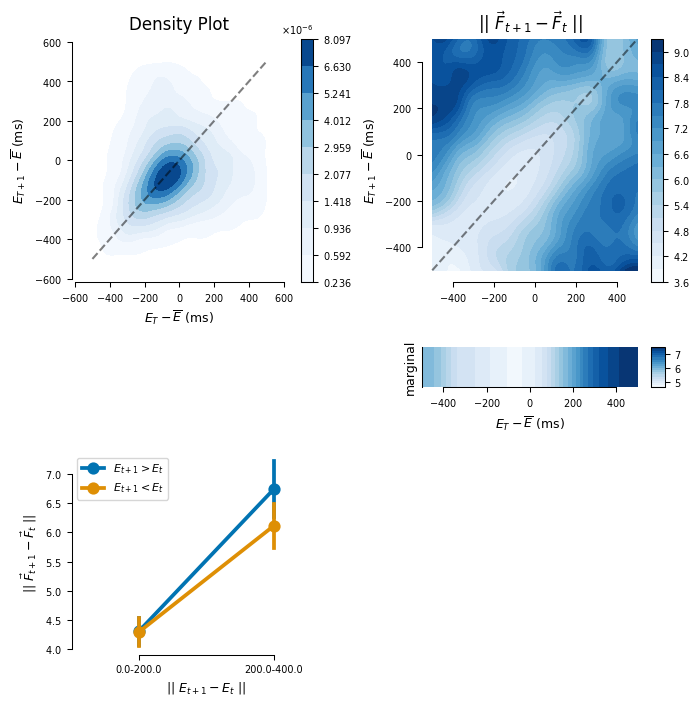

ANOVA results for neighbour distances:
                        Anova
                        F Value Num DF  Den DF Pr > F
-----------------------------------------------------
ET_diff_bin             54.5510 1.0000 14.0000 0.0000
is_pos_diff              4.2709 1.0000 14.0000 0.0578
ET_diff_bin:is_pos_diff  3.7312 1.0000 14.0000 0.0739



In [4]:
# Calculating the uclidean force distance between neighbouring trials.
# Controls for execution time differences.

distances = utils.calc_neighbour_distances(data)
utils.plot_neighbour_distances(distances)

# Neighbouring Triplets

100%|██████████| 15/15 [00:01<00:00, 12.31it/s]


ANOVA results for for triplet distances::
                          Anova
                            F Value Num DF  Den DF Pr > F
---------------------------------------------------------
ET_diff_bin                 22.0851 1.0000 14.0000 0.0003
is_middle_error              4.5944 1.0000 14.0000 0.0501
ET_diff_bin:is_middle_error  0.0329 1.0000 14.0000 0.8586



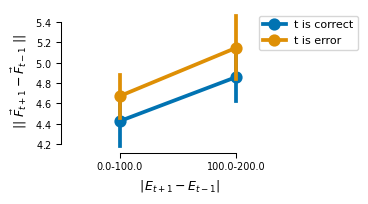

In [5]:
# Calculating the uclidean force distance between first and last trials of each triplet.
# Depending on whether the middle trial is error or correct.
# Controls for execution time differences.

distances = utils.calc_triplet_distances(data)
utils.plot_triplet_distances(distances)

# Detrending + Speed and Force residuals correlation

Subject 1: A = 0.99648, init_slow = 2.97, B = 0.02, C = 0.94199, D = 0.03, sigma=0.75


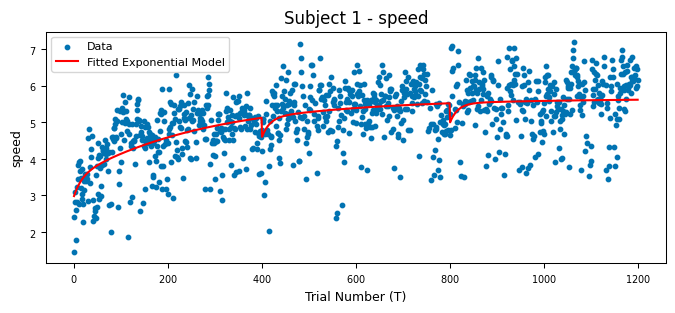

Subject 2: A = 0.99632, init_slow = 2.31, B = 0.01, C = 0.85743, D = 0.06, sigma=0.59


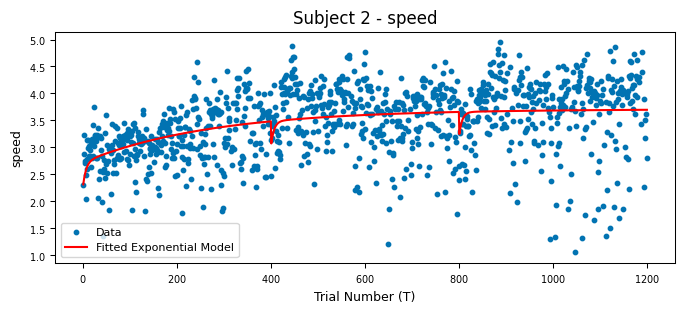

Subject 3: A = 0.99719, init_slow = 1.21, B = 0.01, C = 0.93383, D = 0.03, sigma=0.55


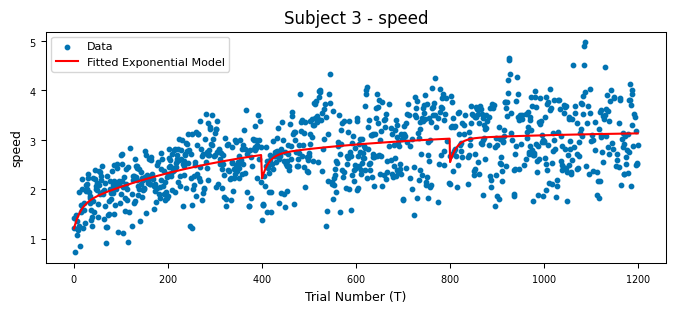

Subject 4: A = 0.99944, init_slow = 1.53, B = 0.00, C = 0.51346, D = 0.34, sigma=0.55


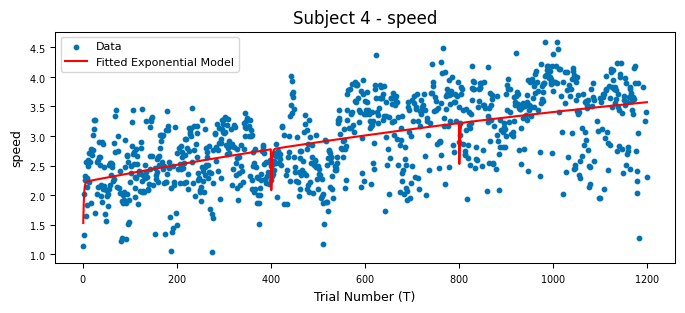

Subject 5: A = 0.99637, init_slow = 2.00, B = 0.01, C = 0.89899, D = 0.04, sigma=0.52


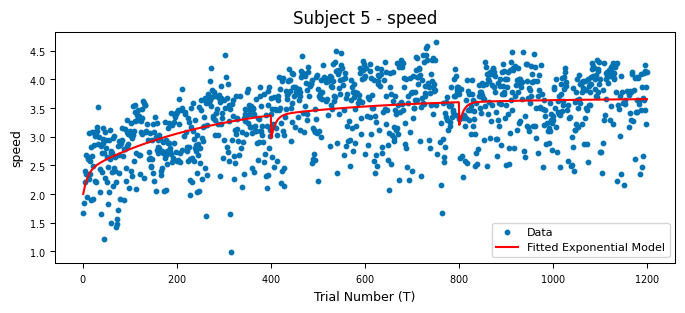

Subject 6: A = 0.99485, init_slow = 1.74, B = 0.01, C = 0.85449, D = 0.15, sigma=0.60


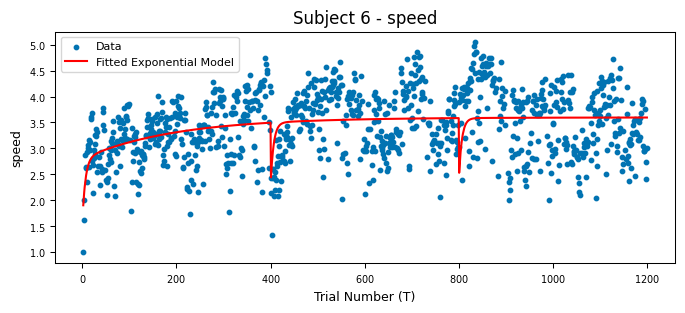

Subject 7: A = 0.99480, init_slow = 2.42, B = 0.02, C = 0.88487, D = 0.03, sigma=0.44


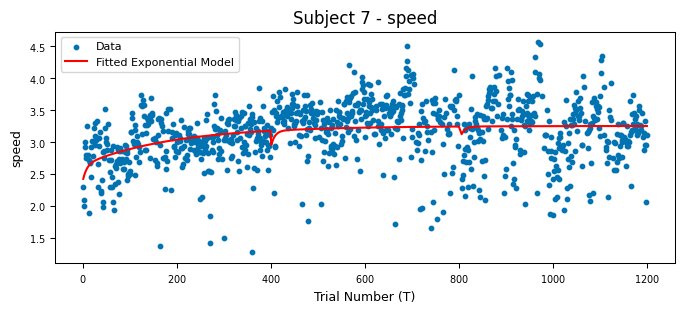

Subject 9: A = 0.99685, init_slow = 1.22, B = 0.01, C = 0.90771, D = 0.04, sigma=0.43


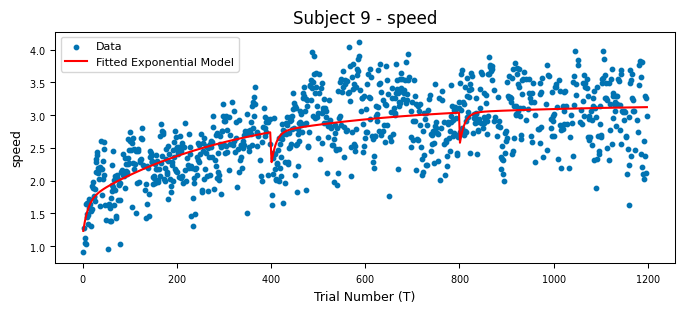

Subject 10: A = 0.99764, init_slow = 1.93, B = 0.01, C = 0.97798, D = 0.02, sigma=0.63


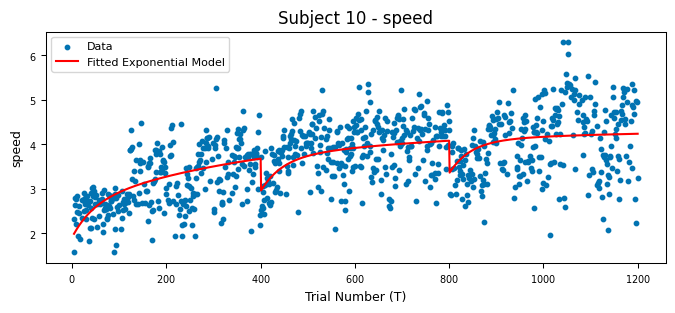

Subject 11: A = 1.00000, init_slow = 2.93, B = 0.00, C = 0.92472, D = 0.02, sigma=0.66


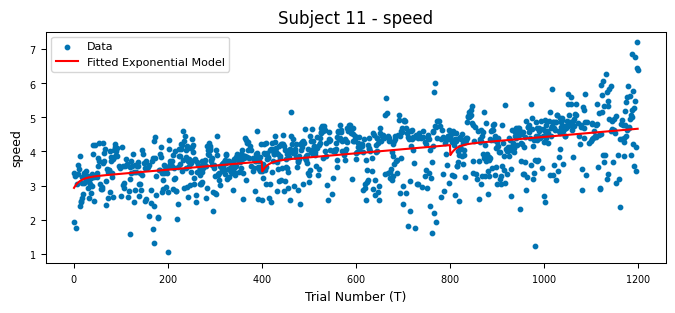

Subject 12: A = 0.99787, init_slow = 1.61, B = 0.01, C = 0.92220, D = 0.06, sigma=0.63


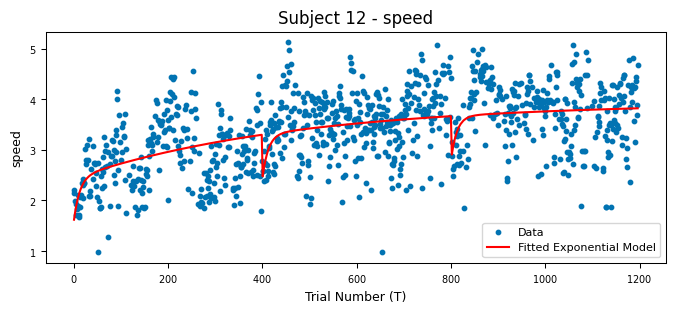

Subject 13: A = 1.00000, init_slow = 2.68, B = 0.00, C = 0.50276, D = 0.00, sigma=0.56


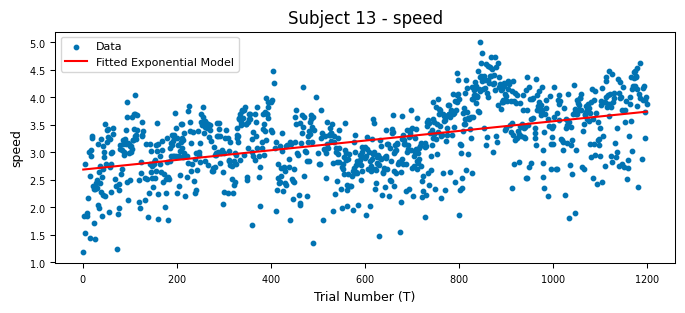

Subject 14: A = 1.00000, init_slow = 2.82, B = 0.00, C = 0.99712, D = 0.00, sigma=0.54


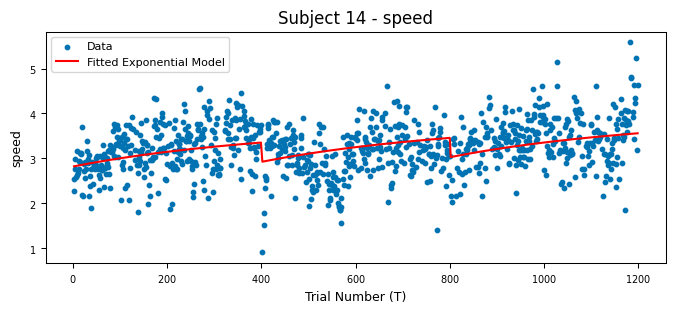

Subject 15: A = 1.00000, init_slow = 3.30, B = 0.00, C = 1.00000, D = 0.00, sigma=0.53


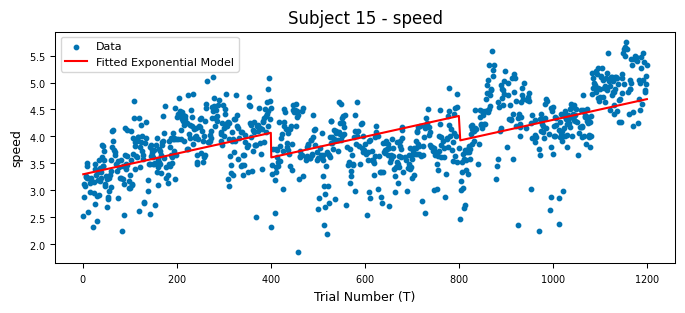

Subject 16: A = 0.99830, init_slow = 1.45, B = 0.01, C = 0.92361, D = 0.07, sigma=0.72


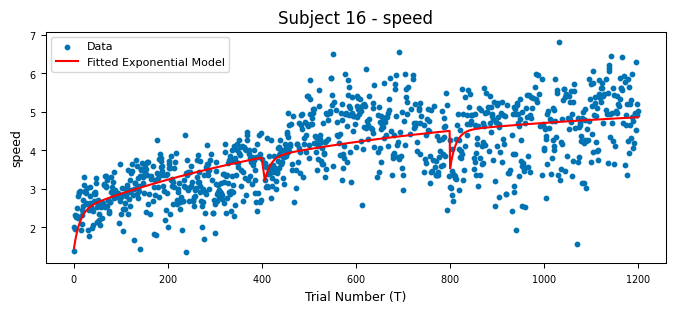

In [7]:
######### DETRENDING Plotting ##########
###fits a slow + fast model: 
###slow component: y_t = A * y_t-1 + B -> y_t = A^t * y0 + B * (1 - A^t) / (1 - A)
###fast component: y_t = C * y_t-1 + D -> y_t = D * (1 - C^t) / (1 - C) (initial value set to 0)
###total: y = slow + fast
###

### set feature to see detrending fits
feature = 'speed' # options: 'speed', 'ET', 'PC_1', 'PC_2', 'PC_3', ...
utils.plot_detrending_fits(data, feature)

/Users/amin/projects/LearningDynamics/WiestlerSequenceMOG/Detrending.py:65: OptimizeWarning: Covariance of the parameters could not be estimated
  params = curve_fit(model, T, feature_values, p0=initial_guess, full_output=True, maxfev=50000)
/Users/amin/projects/LearningDynamics/WiestlerSequenceMOG/Detrending.py:65: OptimizeWarning: Covariance of the parameters could not be estimated
  params = curve_fit(model, T, feature_values, p0=initial_guess, full_output=True, maxfev=50000)


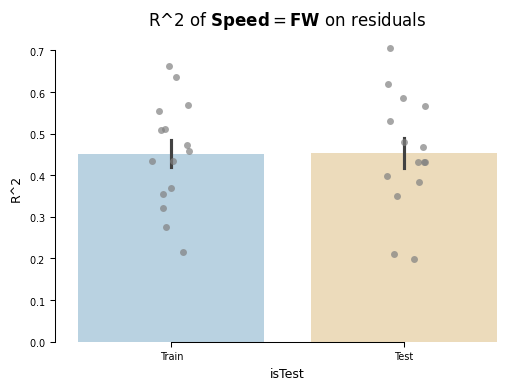

In [8]:
# fitting a linear model speed = FW to detrended data
# trained on 9/10 of data, tested on 1/10 of data

residual_data = Detrending.detrend(data)
residual_data_correct = residual_data[residual_data['isError'] == False]
train_r2s, test_r2s = utils.plot_residual_fits(residual_data_correct)

# Policy Optimization Model (Incomplete)

In [4]:
### DATA LOADING
### Change gl.data_dir to your data directory in setglobals.py before running
model_data = pd.read_csv(gl.data_dir + 'PolicyOptimizationModel.csv', sep = '\t')
model_data['forceVector'] = model_data[[col for col in model_data.columns if col.startswith('PC_')]].apply(lambda x: np.array(x), axis=1)
# model_data = model_data.drop(columns=[col for col in model_data.columns if col.startswith('PC_')])

# change correspondingly for each experiment
n_trials_per_block = 20
n_blocks_per_day = 20
n_trials_per_day = n_trials_per_block * n_blocks_per_day
n_days = 3

# - SubNum: Subject number (e.g., 1 to 16 (exlcuding 8))
# - BN: Block number
# - TN: Trial number within the block (integer, from 1 to n_trials_per_block)
# - ET: Execution time in milliseconds
# - day: Day of the experiment (from 1 to n_days)
# - isError: Boolean flag indicating if the trial was an error (True/False)
# - T: Overall trial number across the experiment
# - seq: Sequence identifier (integer)
# - hand: Hand used (integer, e.g., 0 or 1 for left/right)
# - points: Points scored in the trial (-1 for error, 0, 1, or 3 for correct)
# - forceVector: Numpy array of force components after PCA

print(model_data.columns.tolist())  # To list the column names


['SubNum', 'T', 'PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6', 'PC_7', 'PC_8', 'PC_9', 'PC_10', 'PC_11', 'PC_12', 'PC_13', 'PC_14', 'PC_15', 'BN', 'TN', 'ET', 'day', 'isError', 'seq', 'hand', 'points', 'forceVector']


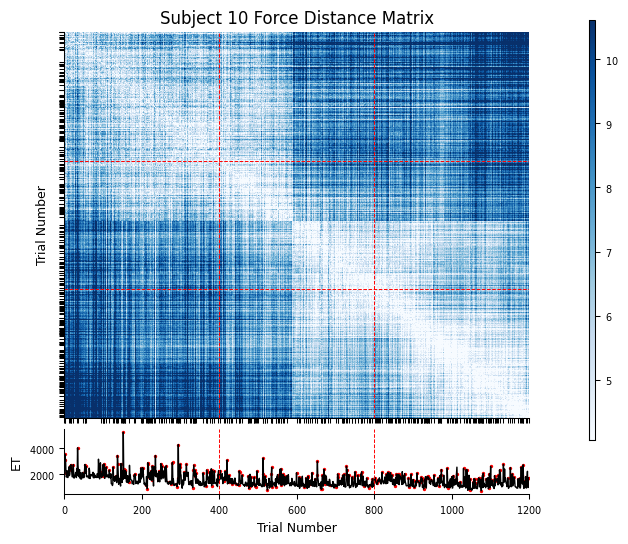

In [5]:
# This function plots the force distance matrix for a given subject across all trials.
# Red dashed lines separate days. Below the heatmap, it plots execution times aligned with the trials.
# Red dots indicate error trials.

# Parameters:
# - data: experiment data
# - subj: int, the subject number to plot
# - n_trials_per_day
# - n_days

utils.plot_force_movement_dynamics(model_data, subj=10, n_trials_per_day=n_trials_per_day, n_days=n_days)

100%|██████████| 15/15 [00:00<00:00, 19.87it/s]


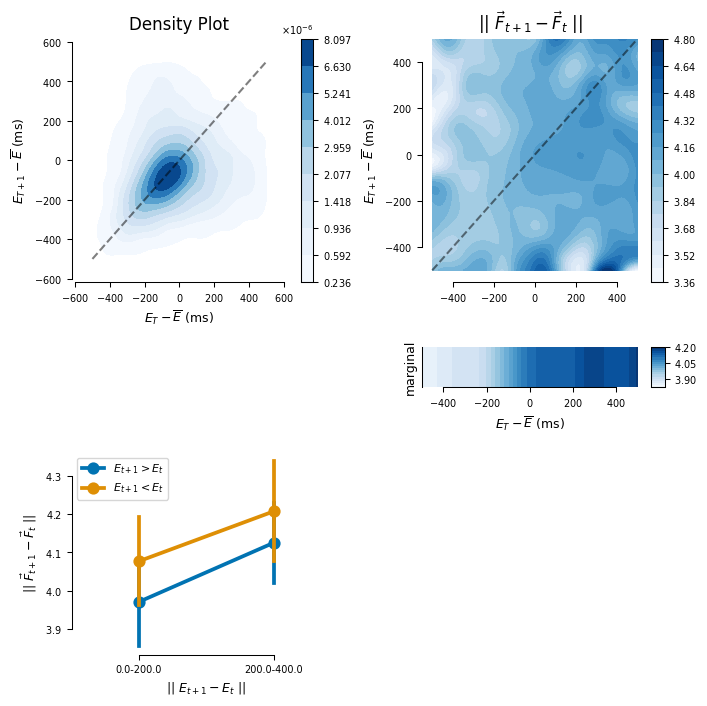

ANOVA results for neighbour distances:
                        Anova
                        F Value Num DF  Den DF Pr > F
-----------------------------------------------------
ET_diff_bin             10.2457 1.0000 14.0000 0.0064
is_pos_diff              5.8791 1.0000 14.0000 0.0294
ET_diff_bin:is_pos_diff  0.1436 1.0000 14.0000 0.7104



In [6]:
# Calculating the uclidean force distance between neighbouring trials.
# Controls for execution time differences.

distances = utils.calc_neighbour_distances(model_data)
utils.plot_neighbour_distances(distances)

100%|██████████| 15/15 [00:01<00:00, 12.57it/s]


ANOVA results for for triplet distances::
                          Anova
                            F Value Num DF  Den DF Pr > F
---------------------------------------------------------
ET_diff_bin                  5.2183 1.0000 14.0000 0.0385
is_middle_error              1.4652 1.0000 14.0000 0.2461
ET_diff_bin:is_middle_error  0.3636 1.0000 14.0000 0.5561



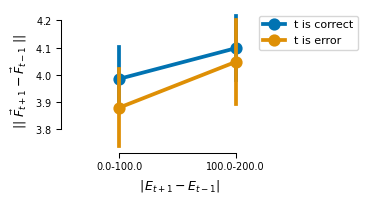

In [133]:
# Calculating the uclidean force distance between first and last trials of each triplet.
# Depending on whether the middle trial is error or correct.
# Controls for execution time differences.

distances = utils.calc_triplet_distances(model_data)
utils.plot_triplet_distances(distances)

Subject 1: a=-0.01, b=0.00393, c=0.90, sigma=1.13


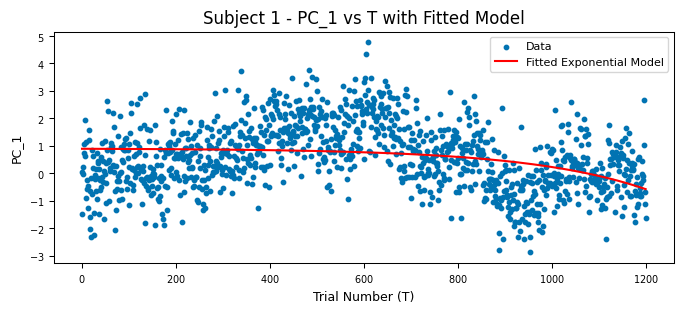

Subject 2: a=408.05, b=-0.00000, c=-406.12, sigma=1.14


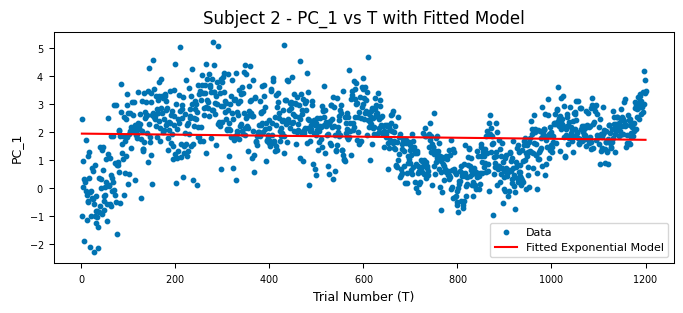

Subject 3: a=-19656.57, b=-0.00000, c=19656.50, sigma=0.81


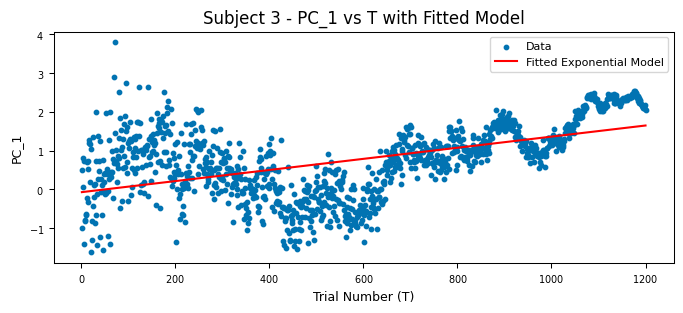

Subject 4: a=-0.02, b=0.00360, c=1.58, sigma=0.91


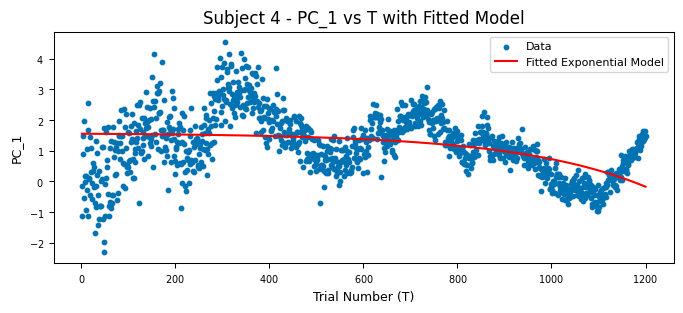

Subject 5: a=-28.07, b=-0.00016, c=28.00, sigma=0.76


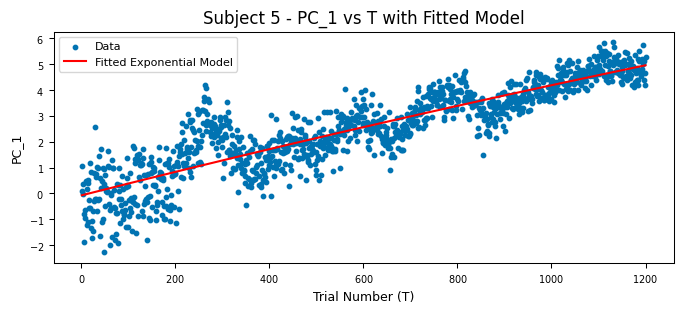

Subject 6: a=13.67, b=-0.00038, c=-13.87, sigma=1.24


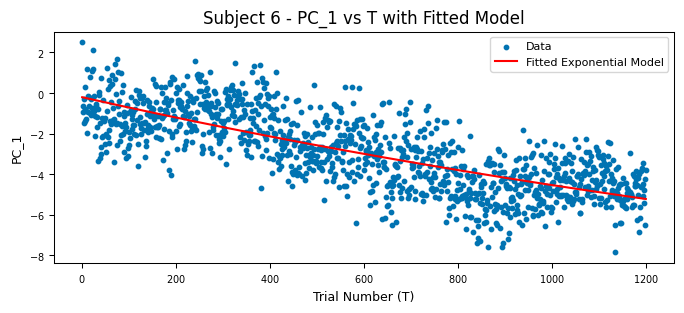

Subject 7: a=-8.91, b=-0.00083, c=7.89, sigma=0.97


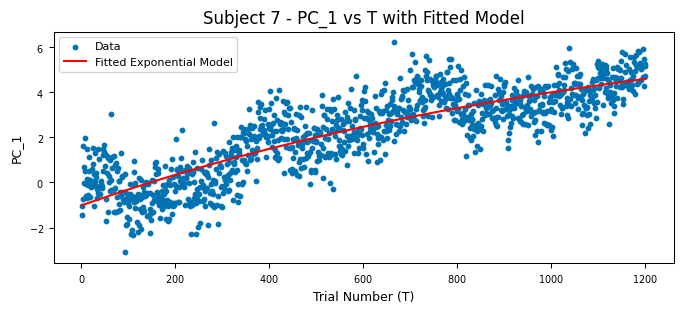

Subject 9: a=-4.55, b=-0.00814, c=2.97, sigma=1.47


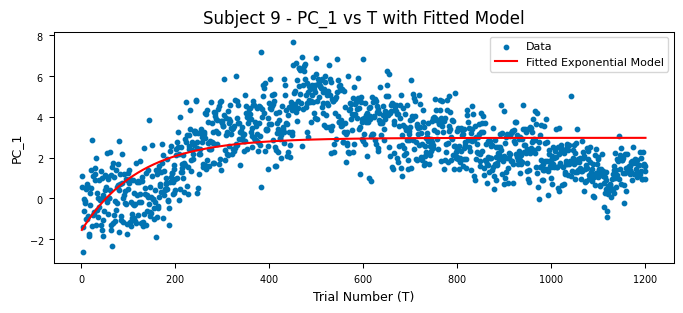

Subject 10: a=-2.27, b=-0.02014, c=1.47, sigma=0.77


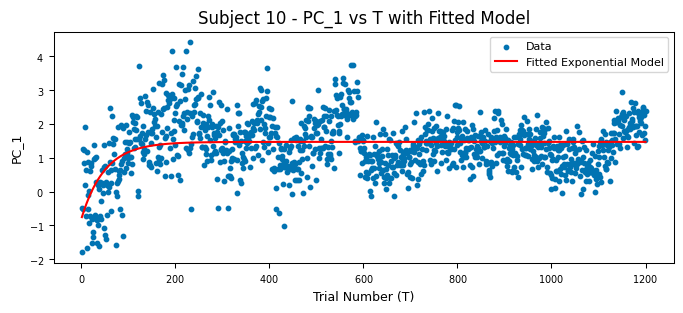

Subject 11: a=2.32, b=-0.00149, c=-2.88, sigma=0.94


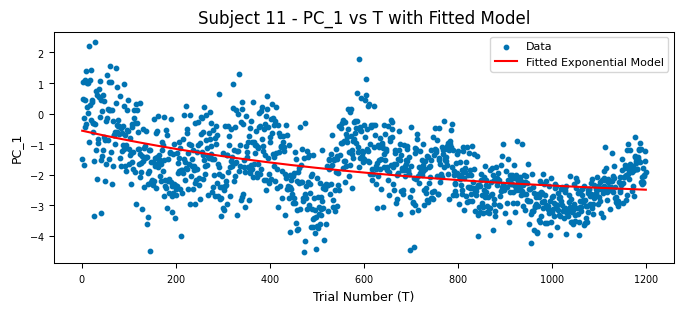

Subject 12: a=-4.42, b=-0.00251, c=3.56, sigma=1.31


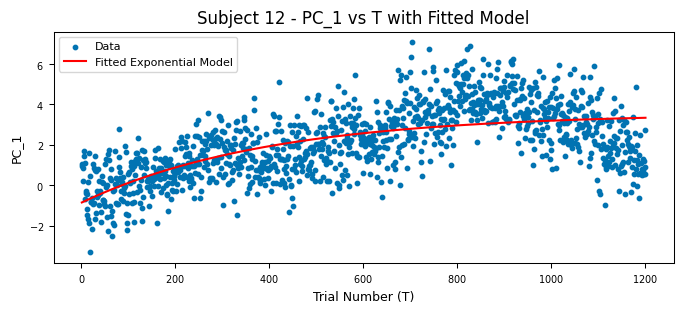

Subject 13: a=-0.04, b=0.00357, c=-0.36, sigma=0.89


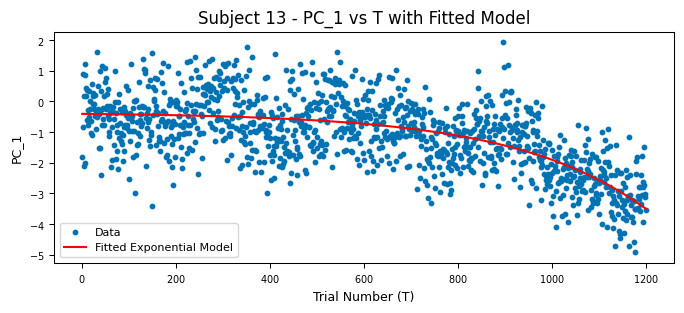

Subject 14: a=18926.91, b=-0.00000, c=-18926.07, sigma=1.01


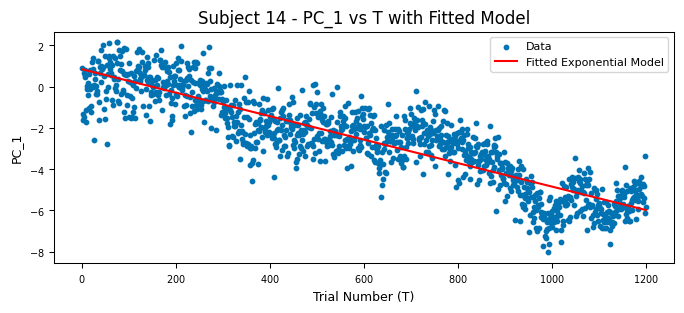

Subject 15: a=1.64, b=-0.01199, c=-2.03, sigma=1.07


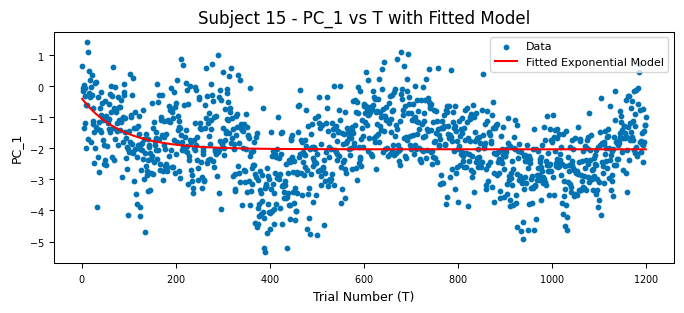

Subject 16: a=-0.71, b=0.00174, c=2.23, sigma=1.10


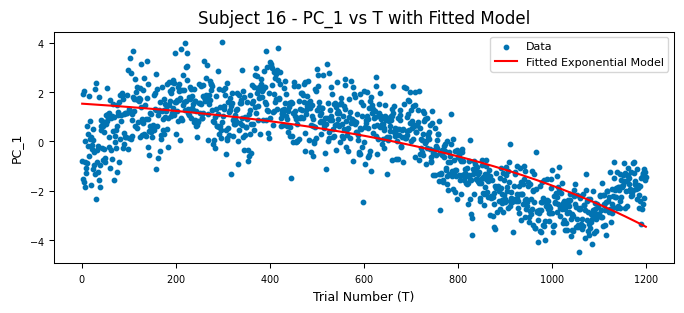

In [103]:
# fit exponential model to ET and Forces for each subject

# exp model: ET/F = a * exp(b * T) + c

features = [col for col in model_data.columns if col.startswith('PC_')] + ['ET']

def exp_model(T, a, b, c):
    return a * np.exp(b * T) + c

def fit_exp_model(model_data, subj, feature):
    from scipy.optimize import curve_fit

    subj_data = model_data[model_data['SubNum'] == subj]
    T = subj_data['T'].values
    feature_values = subj_data[feature].values

    # Initial guess for parameters a, b, c
    if feature == 'ET':
        initial_guess = [1000, -0.001, 1000]
    else:
        initial_guess = [0, 0, 0]


    # Fit the model to the model_data
    params = curve_fit(exp_model, T, feature_values, p0=initial_guess, full_output=True, maxfev=10000)
    residuals = params[2]['fvec']
    # print(residuals)
    # noise_scale = np.std(residuals)
    # noise_scale = np.sqrt(np.sum(residuals**2) / (len(ET) - len(params[0])))
    noise_scale = np.sqrt(np.sum(residuals**2) / (len(feature_values) - 1))
    return params[0], noise_scale  # returns a, b, c, sigma

subj_params = {}
for subj in model_data['SubNum'].unique():
    feature = 'PC_1'
    try:
        params, sigma = fit_exp_model(model_data, subj, feature)
    except RuntimeError:
        print(f"Could not fit model for subject {subj}")
        continue
    subj_params[subj] = params , sigma
    print(f"Subject {subj}: a={params[0]:.2f}, b={params[1]:.5f}, c={params[2]:.2f}, sigma={sigma:.2f}")
    # plot generated exp model against model_data
    subj_data = model_data[model_data['SubNum'] == subj]
    T = subj_data['T'].values
    feature_values = subj_data[feature].values
    feature_fit = exp_model(T, *params)
    plt.figure(figsize=(8,3))
    plt.scatter(T, feature_values, label='Data', s=10)
    plt.plot(T, feature_fit, color='red', label='Fitted Exponential Model')
    plt.xlabel('Trial Number (T)')
    plt.ylabel(feature)
    plt.title(f'Subject {subj} - {feature} vs T with Fitted Model')
    # plt.ylim(500, 4000)
    plt.legend()
    plt.show()


In [130]:
residual_data = model_data.copy()
subjs_not_having_all_features = set()
for subj in model_data['SubNum'].unique():
    for feature in features:
        try:
            params, sigma = fit_exp_model(model_data, subj, feature)
        except RuntimeError:
            print(f"Could not fit model for subject {subj}, feature {feature}")
            subjs_not_having_all_features.add(subj)
            continue
        subj_data = model_data[model_data['SubNum'] == subj]
        T = subj_data['T'].values
        feature_values = subj_data[feature].values
        feature_fit = exp_model(T, *params)
        residuals = feature_values - feature_fit
        residual_data.loc[residual_data['SubNum'] == subj, feature] = residuals
### Now residual_data contains the residuals after removing the exponential trend
residual_data['forceVector'] = residual_data[[col for col in residual_data.columns if col.startswith('PC_')]].apply(lambda x: np.array(x), axis=1)


In [131]:
import statsmodels.api as sm
test_r2s = []
for subnum, subdata in residual_data.groupby('SubNum'):
    # randomly select 1/10 test set trials
    n_trials = len(subdata)
    n_test = n_trials // 10
    test_indices = np.random.choice(subdata.index, size=n_test, replace=False)
    train_indices = subdata.index.difference(test_indices)
    train_data = subdata.loc[train_indices]
    test_data = subdata.loc[test_indices]

    # fit ET = F W with OLS with intercept
    F_train = np.vstack(train_data['forceVector'].values)
    ET_train = train_data['ET'].values
    F_train = sm.add_constant(F_train)  # adds intercept term
    model = sm.OLS(ET_train, F_train).fit()
    #calculate R^2 on train set
    ET_train_pred = model.predict(F_train)
    ss_res_train = np.sum((ET_train - ET_train_pred) ** 2)
    ss_tot_train = np.sum((ET_train - np.mean(ET_train)) ** 2)
    r2_train = 1 - (ss_res_train / ss_tot_train)

    
    # print(f"Subject {subnum} OLS Regression Results:")
    # print(model.summary())
    # evaluate on test set
    F_test = np.vstack(test_data['forceVector'].values)
    F_test = sm.add_constant(F_test)  # adds intercept term
    ET_test = test_data['ET'].values
    ET_pred = model.predict(F_test)
    #calculate R^2
    ss_res = np.sum((ET_test - ET_pred) ** 2)
    ss_tot = np.sum((ET_test - np.mean(ET_test)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    print(f"****** Subject {subnum} ******")
    print(f"Train R^2: {r2_train:.4f}")
    print(f"Test R^2: {r2:.4f}")
    test_r2s.append(r2)

    

****** Subject 1 ******
Train R^2: 0.0217
Test R^2: -0.0366
****** Subject 2 ******
Train R^2: 0.0266
Test R^2: 0.0308
****** Subject 3 ******
Train R^2: 0.0210
Test R^2: -0.0963
****** Subject 4 ******
Train R^2: 0.0381
Test R^2: -0.0103
****** Subject 5 ******
Train R^2: 0.0252
Test R^2: -0.0393
****** Subject 6 ******
Train R^2: 0.0489
Test R^2: -0.0255
****** Subject 7 ******
Train R^2: 0.0183
Test R^2: -0.0431
****** Subject 9 ******
Train R^2: 0.0212
Test R^2: -0.0052
****** Subject 10 ******
Train R^2: 0.0126
Test R^2: -0.0449
****** Subject 11 ******
Train R^2: 0.0130
Test R^2: -0.0073
****** Subject 12 ******
Train R^2: 0.0295
Test R^2: -0.0147
****** Subject 13 ******
Train R^2: 0.0544
Test R^2: 0.0777
****** Subject 14 ******
Train R^2: 0.0193
Test R^2: -0.0116
****** Subject 15 ******
Train R^2: 0.0533
Test R^2: 0.0700
****** Subject 16 ******
Train R^2: 0.0424
Test R^2: -0.0004
